In [8]:
import warnings
import os, sys
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from datetime import datetime
from pmdarima import auto_arima
import yfinance as yf
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
warnings.filterwarnings("ignore")



In [9]:
os.getcwd()

'/Users/chriskehl/Library/Mobile Documents/com~apple~CloudDocs/data_files/timeSeries'

In [10]:
os.chdir('/Users/chriskehl/Library/Mobile Documents/com~apple~CloudDocs/data_files/timeSeries')

In [11]:
os.getcwd()

'/Users/chriskehl/Library/Mobile Documents/com~apple~CloudDocs/data_files/timeSeries'

In [12]:
# Download Fisker stock
data = yf.download('FSR','2020-07-01','2021-03-10')

[*********************100%***********************]  1 of 1 completed


In [13]:
# View of the first few trading days of Fisker stock (FSR) 
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,10.80,10.80,10.68,10.71,10.71,577300
2020-07-02,10.79,10.88,10.68,10.85,10.85,842600
2020-07-06,11.00,11.08,10.91,10.93,10.93,1358300
2020-07-07,10.95,10.95,10.65,10.71,10.71,862700
2020-07-08,10.70,10.81,10.63,10.81,10.81,1485200


In [14]:
# Look at the last few days of Fisker stock (FSR) 
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-03,28.250000,28.260000,24.000000,24.480000,24.480000,27985400
2021-03-04,23.920000,24.330000,21.000000,22.580000,22.580000,24628400
2021-03-05,23.299999,23.299999,19.280001,21.299999,21.299999,20816800
2021-03-08,22.799999,23.570000,21.520000,21.740000,21.740000,13902800
2021-03-09,23.280001,23.690001,21.910000,22.180000,22.180000,17995700


<AxesSubplot:title={'center':'Fisker Closing Price'}, xlabel='Date'>

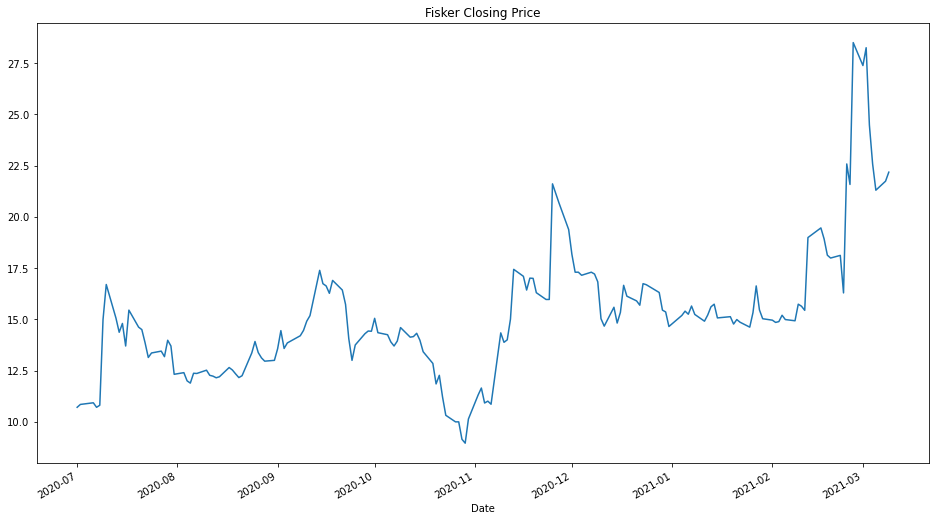

In [15]:
data['Close'].plot(label='FSR', figsize=(16,9), title='Fisker Closing Price')

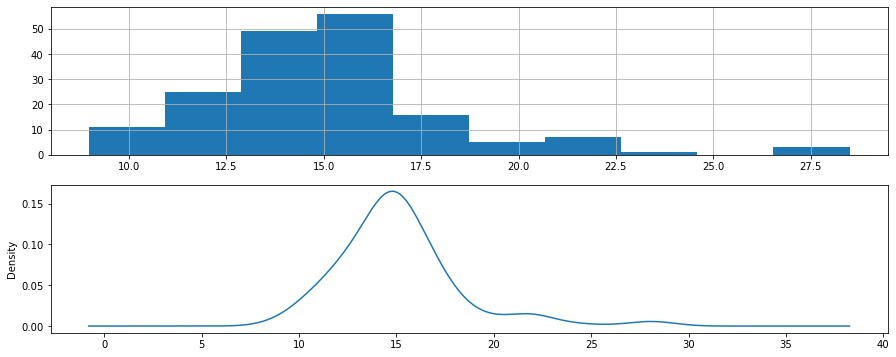

In [16]:
# Histogram of the closing price

plt.figure(1, figsize=(15,6))
plt.subplot(211)
data["Close"].hist()
plt.subplot(212)
data["Close"].plot(kind='kde')
plt.show()

In [17]:
# Find the best smoothing parameter ranging from 0 - 1
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred)/ y_true)) *100
    print('Evaluation metric results:-')
    print(f'MAE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}', end='\n\n')

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series, column_name):
    print(f'Results of Dickey-Fuller test for column: {column_name}')
    

In [ ]:
# Our timeSeries model will only be done on the closing column.
# The training set will have all the data expected for the last 30 days
# The the test contains only the last 30 days to evaluate against predictions.

X = data['Close']
test = X.iloc[-30:]
train = X.iloc[:-30]

In [ ]:
# view of the test data
print(test)

In [ ]:
# View of the train data
print(train)

In [ ]:
# Using a simple smoothing parameter to find the best fit 0 - 1

resu = []
temp_df = pd.DataFrame()
for i in [0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]:
    print(f'Fitting for smoothing level= {i}')
fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
fcst_pred_v= fit_v.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_pred_v)
rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
df3 = {'smoothing parameter':i, 'RMSE': rmse}
temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE']).head(3)

In [ ]:
# Train the data with SimpleExpSmoothing using the parameters 
# found from the best fit algorithm above

fitSES = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

In [ ]:
# check to see if SimpleExpSmoothing can find the best parmaeters by itself
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit(optimized=True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

In [ ]:
fitSESauto.summary()

In [ ]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_search'])
df_fcst_gs_pred["new_index"]=range(77, 107)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"]=range(77, 107)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")



In [ ]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(train, label='Train')
plt.plot(test, label='Test')
#plt.plot(fcst_auto_pred, label='Simple Exponential Smoothing using optimized = True')
#plt.plot(fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

In [ ]:
# Note above needs to fit into the range